In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def weight_variable(shape):
    initial = tf.random_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x,W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [13]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

x_image = tf.reshape(x, [-1, 28, 28,1])

w_conv = weight_variable([5,5,1,10])
b_conv = weight_variable([10])

w_fc1 = weight_variable([14*14*10, 400])
b_fc1 = weight_variable([400])

w_fc2 = weight_variable([400, 10])
b_fc2 = weight_variable([10])

#keep = tf.placeholder('float')

h_conv = tf.nn.relu( conv2d(x_image, w_conv) + b_conv)
h_pool = max_pool_2x2(h_conv)
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*10])

h_fc1 = tf.nn.relu( tf.matmul(h_pool_flat, w_fc1) + b_fc1 )
#h_fc1_drop = tf.nn.dropout(h_fc1, keep)
y = tf.nn.softmax( tf.matmul(h_fc1, w_fc2) + b_fc2)

mse =  tf.reduce_mean(tf.square(y-y_))
train_step = tf.train.AdamOptimizer(0.01).minimize(mse)

sess = tf.Session()
sess.run(tf.initialize_all_variables())


In [26]:
for i in range(350):
    batchX, batchY = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batchX, y_: batchY})
    if i % 50 == 0:
        print 'Iteration: '+str(i)+' train MSE: '+str(
            sess.run(mse,feed_dict={x: batchX, y_: batchY}))

        

Iteration: 0 train MSE: 0.00635515
Iteration: 50 train MSE: 0.00192434
Iteration: 100 train MSE: 0.00798202
Iteration: 150 train MSE: 0.00300245
Iteration: 200 train MSE: 0.00504747
Iteration: 250 train MSE: 0.000795756
Iteration: 300 train MSE: 0.00545989


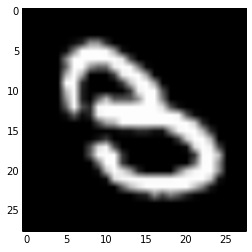

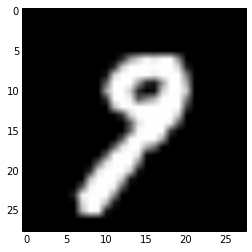

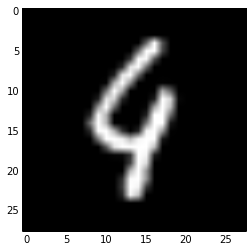

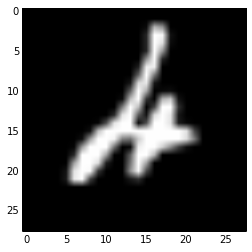

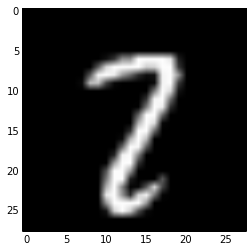

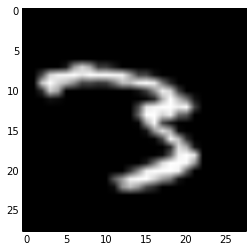

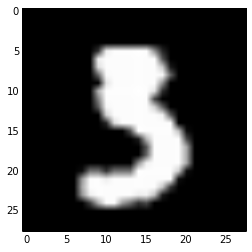

0.0254


In [30]:
pred = np.argmax(sess.run(y, feed_dict={x:mnist.test.images, y_:mnist.test.labels}), axis=1)

trueLabels = np.argmax(mnist.test.labels, axis=1)

errors = 0.

for i in range(pred.shape[0]):
    if pred[i] != trueLabels[i]:
        if i < 500:
            plt.imshow(mnist.test.images[i].reshape(28,28), cmap='gray')
            plt.show()
        errors = errors+1

print errors/pred.shape[0]

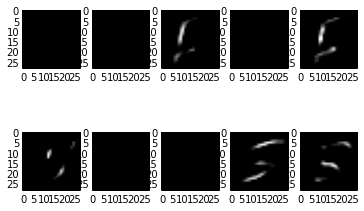

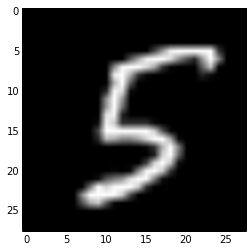

In [28]:
img = sess.run(h_conv, feed_dict={x: mnist.test.images[0:100]})

f, axes = plt.subplots(2,5)
index = 23

for i in range(10):
    axes.ravel()[i].imshow(img[index,:,:,i], cmap='gray')
plt.show()
plt.imshow(mnist.test.images[index].reshape(28,28), cmap='gray')

(5, 5, 1, 10)


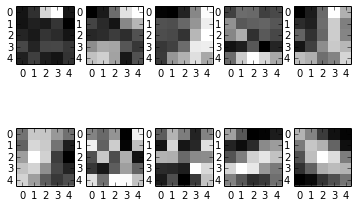

In [29]:
kernels = sess.run(w_conv)
print kernels.shape

f, axes = plt.subplots(2,5)

for i in range(10):
    axes.ravel()[i].imshow(kernels[:,:,0,i], cmap='gray', interpolation='none')